In [1]:
%pylab inline
#Populating the interactive namespace from numpy and matplotlib
#Import scikit-learn, numpy and pyplot
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Load Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print (X_iris.shape, y_iris.shape)
print( X_iris[0], y_iris[0])

(150, 4) (150,)
[ 5.1  3.5  1.4  0.2] 0


### Create training and testing partitions and standarize data.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# Get dataset with only the first two attributes
X, y = X_iris[:,:2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print (X_train.shape, y_train.shape)
# Standarize the features
# Feature Scaling
#For each feature, calculate the average, subtract the mean
#value from the feature value, and divide the result by their standard deviation. After
#scaling, each feature will have a zero average, with a standard deviation of one.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


(112, 2) (112,)


### Plot the training data.

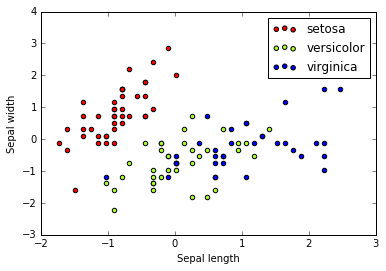

In [7]:
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    px = X_train[:, 0][y_train == i]
    py = X_train[:, 1][y_train == i]
    plt.scatter(px, py, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Looking at the preceding screenshot, we can see that the separation between the red
dots (corresponding to the Iris setosa) and green and blue dots (corresponding to the
two other Iris species) is quite clear, while separating green from blue dots seems a
very difficult task, given the two features available

To implement linear classification, we will use the SGDClassifier from scikit-learn.
SGD stands for Stochastic Gradient Descent, a very popular numerical procedure
to find the local minimum of a function (in this case, the loss function, which
measures how far every instance is from our boundary). The algorithm will learn the
coefficients of the hyperplane by minimizing the loss function.

#### To use any method in scikit-learn,
we must first create the corresponding classifier object, initialize its parameters, and train the model that better fits the training data.

### Fit a Linear Classification method.

In [9]:
# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

For the
moment, we will use the default values, but keep in mind that these parameters
could be very important, especially when you face more real-world tasks, where the
number of instances (or even the number of attributes) could be very large. 

The fit
function is probably the most important one in scikit-learn. It receives the training
data and the training classes, and builds the classifier. Every supervised learning
method in scikit-learn implements this function.

### Every classification decision depends just on a hyperplane.

That
hyperplane is, then, our model. 

The coef_ attribute of the clf object (consider, for
the moment, only the first row of the matrices), now has the coefficients of the linear
boundary and the intercept_ attribute, the point of intersection of the line with the
y axis.

In [11]:
# print learned coeficients
print (clf.coef_)
print (clf.intercept_)

[[-35.15056178  19.74436595]
 [  7.21378436 -18.84799596]
 [ 26.08674786   4.07000427]]
[-11.73953054 -15.63066843  -4.05654805]


##### With these three values, we can draw a line, represented by the following equation:
-11.73953054 - 15.63066843 * x1 - 4.05654805 * x2 = 0

Now, given x1 and x2 (our real-valued features), we just have to compute the value
of the left-side of the equation: if its value is greater than zero, then the point is
above the decision boundary (the red side), otherwise it will be beneath the line (the
green or blue side). Our prediction algorithm will simply check this and predict the
corresponding class for any new iris flower.

##### why does our coefficient matrix have three rows?

Because we did not tell the
method that we have changed our problem definition (how could we have done
this?), and it is facing a three-class problem, not a binary decision problem. W

What, in
this case, the classifier does is the same we did—it converts the problem into three
binary classification problems in a one-versus-all setting (it proposes three lines that
separate a class from the rest).

Plot the three decision curves. Note that Class 0 is linearly separable, while Class 1 and Class 2 are not

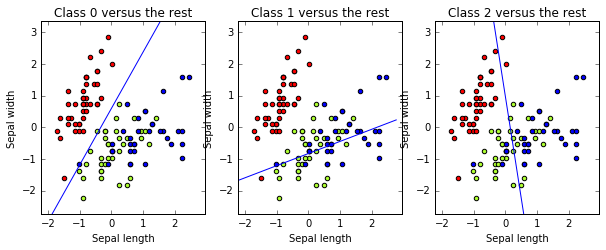

In [14]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    sca(axes[i])
    for j in range(len(colors)):
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        plt.scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys,hold=True)

The first plot shows the model built for our original binary problem. It looks like
the line separates quite well the Iris setosa from the rest. For the other two tasks, as
we expected, there are several points that lie on the wrong side of the hyperplane.

##### Suppose that we have a new flower 
with a sepal width of 4.7 and a sepal length of 3.1, and we want to predict its class. We just have to apply
our brand new classifier to it (after normalizing!).

The predict method takes
an array of instances (in this case, with just one element) and returns a list of
predicted classes:

In [16]:
#Evaluate a particular instance
print (clf.predict(scaler.transform([[4.7, 3.1]])))

#If our classifier is right, this Iris flower is a setosa.


#we will select the boundary line whose distance to the
#instance is longer.
print (clf.decision_function(scaler.transform([[4.7, 3.1]])))

[0]
[[ 34.3969495  -26.49609974 -36.52854845]]


## Evaluating our results

The performance of a classifier is a measure of its effectiveness. 

The
simplest performance measure is accuracy: given a classifier and an evaluation
dataset, it measures the proportion of instances correctly classified by the classifier.

First, let's test the accuracy on the training set:

In [17]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print (metrics.accuracy_score(y_train, y_train_pred))

0.794642857143


This figure tells us that 79.4 percent of the training set instances are correctly classified
by our classifier.

###### If you measure based on your training data, you will never detect overfitting. So, never measure based on your training data.

we
want to evaluate performance on previously unseen data. Let's check the accuracy
again, now on the evaluation set (recall that it was already scaled):

In [19]:
#Measure accuracy on the testing set
y_pred = clf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.631578947368


We obtained an accuracy of 63 percent in our testing set. 

Usually, accuracy on the
testing set is lower than the accuracy on the training set, since the model is actually
modeling the training set, not the testing set.

Accuracy on the test set is a good performance measure when the number of instances
of each class is similar, that is, we have a uniform distribution of classes. 

But if you
have a skewed distribution (say, 99 percent of the instances belong to one class), a
classifier that always predicts the majority class could have an excellent performance in
terms of accuracy despite the fact that it is an extremely naive method.

###### We can define these measures in terms of True and False, and Positives and Negatives:
    
                    
With m being the sample size (that is, True Positive(TP) + True Negative(TN) + False Positive(FP) + False Negative(FN)), we have the
following formulae:

• Accuracy = (TP + TN) / m

• Precision = TP / (TP + FP)

• Recall = TP / (TP + FN)

• F1-score = 2 * Precision * Recall / (Precision + Recall)

###### Evaluate results using Precision, Recall and F-score, and show the confusion matrix

In [21]:
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.20      0.09      0.13        11
  virginica       0.60      0.79      0.68        19

avg / total       0.57      0.63      0.59        38



The classifier obtained 1.0 precision and recall in the setosa class. This
means that for precision, 100 percent of the instances that are classified as
setosa are really setosa instances, and for recall, that 100 percent of the setosa
instances were classified as setosa.

On the other hand, in the versicolor class, the results are not as good:
we have a precision of 0.20, that is, only 20 percent of the instances that are
classified as versicolor are really versicolor instances. Also, for versicolor, we
have a recall of 0.09, that is, only 9 percent of the versicolor instances are
correctly classified.

Now, we can see that our method (as we expected) is very good at predicting
setosa, while it suffers when it has to separate the versicolor or virginica
classes. 

The support value shows how many instances of each class we had in the
testing set.

Another useful metric (especially for multi-class problems) is the confusion matrix:
in its (i, j) cell, it shows the number of class instances i that were predicted to
be in class j. 

A good classifier will accumulate the values on the confusion matrix
diagonal, where correctly classified instances belong.

In [24]:
print (metrics.confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0  1 10]
 [ 0  4 15]]


Our classifier is never wrong in our evaluation set when it classifies class 0 (setosa)
flowers. But, when it faces classes 1 and 2 flowers (versicolor and virginica), it
confuses them. The confusion matrix gives us useful information to know what types
of errors the classifier is making.

###### To finish our evaluation process, we will introduce a very useful method known as cross-validation.

Cross-validation allows us to avoid this particular case, reducing result variance and
producing a more realistic score for our models. 

The usual steps for k-fold
cross-validation are the following:

1. Partition the dataset into k different subsets.

2. Create k different models by training on k-1 subsets and testing on the remaining subset.

3. Measure the performance on each of the k models and take the average measure.

Cross-validation, by default, uses accuracy
as its performance measure, but we could select the measurement by passing any
scorer function as an argument.

We will have to create a composite
estimator made by a pipeline of the standardization and linear models. 

With this
technique, we make sure that each iteration will standardize the data and then
train/test on the transformed data. 

The Pipeline class is also useful to simplify
the construction of more complex models that chain-multiply the transformations.

In [28]:
#Create a new classifier: a pipeline of the standarizer and the linear model. 
#Measure the cross-validation accuracy.

from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold croos validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print (scores)

[ 0.73333333  0.8         0.76666667  0.76666667  0.76666667]


In [29]:
#Calculate the mean and standard error of cross-validation accuracy

from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print (mean_score(scores))

Mean score: 0.767 (+/-0.011)


Our model has an average accuracy of 0.76.

The general rule in order to avoid overfitting is, we should prefer simple (that
is, with less parameters) methods, something that could be seen as an instantiation
of the philosophical principle of Occam's razor, which states that among competing
hypotheses, the hypothesis with the fewest assumptions should be selected.